# HR Analysis - Technical Report
---

In this notebook, I document a working model and provide recommendations.

### Dataset
I will develop a prototype model or process to provide insight on what the year ranges before people are likely to quit or be terminated using the Human Resources Data Set created by Dr. Carla Patalano and Dr. Rich Huebner. In this analysis, I use the core dataset. In total, the data contain 310 observations and 28 features.

### Analysis
The key features that I predict will impact termination status include, length of employment, pay rate, age, department, and performance scores. I hypothesize employees who have been with the company longer will be more likely to terminate than those who have shorter length of employment.

### In this Technical Report:
I discuss the sample size, correlations, feature importance, outliers, variable selection, train/test comparison, and relationships between my target and independent variables.

---

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

#from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# Load data
df_core = pd.read_csv('Data/human-resources-data-set/HRDataset_v9.csv')

In [4]:
# Replace white spaces in column names with '_'
df_core.columns = df_core.columns.str.replace(' ', '_')

#### Note about the Data

I've determined I will not join the core dataset with the production dataset. I believe, for this study, it does not enhance the information I already have in the core dataset. In addition, by retaining this core dataset, I am able to keep more observations for testing.

---

### Exploratory Data Analysis

In this section, I will analyze the shape, data types, and some summary statistics to start getting familiar with the dataset.

In [5]:
# Shape
df_core.shape # 310 rows & 28 variables

(310, 28)

In [6]:
# Data Types
df_core.info()

# Majority of variables in this dataset strings/objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 28 columns):
Employee_Name          310 non-null object
Employee_Number        310 non-null int64
MarriedID              310 non-null int64
MaritalStatusID        310 non-null int64
GenderID               310 non-null int64
EmpStatus_ID           310 non-null int64
DeptID                 310 non-null int64
Perf_ScoreID           310 non-null int64
Age                    310 non-null int64
Pay_Rate               310 non-null float64
State                  310 non-null object
Zip                    310 non-null int64
DOB                    310 non-null object
Sex                    310 non-null object
MaritalDesc            310 non-null object
CitizenDesc            310 non-null object
Hispanic/Latino        310 non-null object
RaceDesc               310 non-null object
Date_of_Hire           310 non-null object
Days_Employed          310 non-null int64
Date_of_Termination    103 non-null object
R

In [7]:
# Summary Statistics
df_core.describe(include = 'all')

,Employee_Name,Employee_Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay_Rate,...,Date_of_Hire,Days_Employed,Date_of_Termination,Reason_For_Term,Employment_Status,Department,Position,Manager_Name,Employee_Source,Performance_Score
count,310,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310,310.000000,103,310,310,310,310,310,310,310
unique,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99,NaN,93,17,5,6,28,21,23,7
top,"Lindsay, Leonara",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1/10/2011,NaN,9/24/2012,N/A - still employed,Active,Production,Production Technician I,Elijiah Gray,Employee Referral,Fully Meets
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14,NaN,2,197,183,208,136,22,31,181
mean,NaN,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,3.458065,38.867742,31.284806,...,NaN,1296.080645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,2.318460,8.922459,15.383615,...,NaN,769.491382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,14.000000,...,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,32.000000,20.000000,...,NaN,766.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,37.000000,24.000000,...,NaN,1238.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,44.000000,45.315000,...,NaN,1732.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Number of unique values for each column
df_core.agg(['count','size','nunique'])

,Employee_Name,Employee_Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay_Rate,...,Date_of_Hire,Days_Employed,Date_of_Termination,Reason_For_Term,Employment_Status,Department,Position,Manager_Name,Employee_Source,Performance_Score
count,310,310,310,310,310,310,310,310,310,310,...,310,310,103,310,310,310,310,310,310,310
size,310,310,310,310,310,310,310,310,310,310,...,310,310,310,310,310,310,310,310,310,310
nunique,310,309,2,5,2,5,6,7,39,94,...,99,181,93,17,5,6,28,21,23,7


#### Dependent Variable Analysis: Employment Status

This analysis will take a look at the effects of the selected features on the likelihood of employee termination. 
In order to do so, I am cleaning Employment_Status to create a binary variable, term_status that shows whether the employee is still employed with the company (0) or terminated (1). 

The variable has been recoded as following: 
- 0: Active, Leave of Absence, Future Start
- 1: Voluntarily Terminated & Terminated for Cause

In [9]:
df_core.Employment_Status.value_counts()

# Based on this info - cleaning DV - Employed & Not Employed

Active                    183
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Future Start               11
Name: Employment_Status, dtype: int64

Text(0.5, 1.0, 'Employment Status - Original')

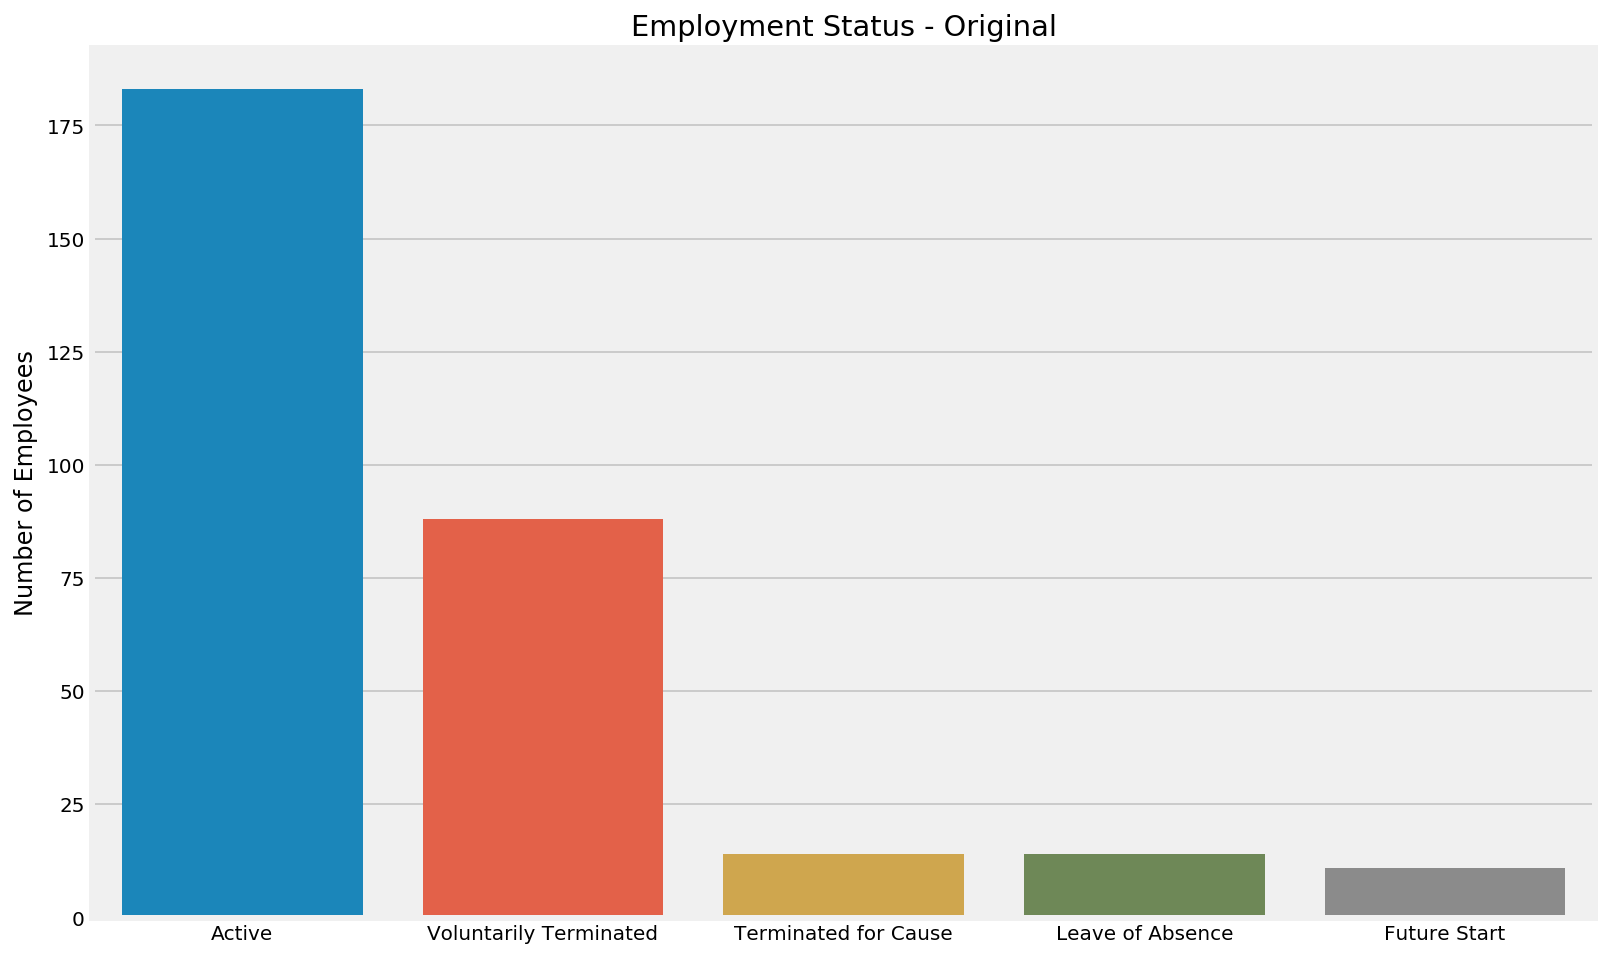

In [10]:
# DV: Employement status distribution - histogram - before recoding
plt.figure(figsize = (12,8))
sns.countplot(x=df_core['Employment_Status'])
plt.xlabel('')
plt.ylabel('Number of Employees')
plt.title('Employment Status - Original')

In [11]:
# Create function to recode values
def employment_status_recode(series):
    if series == "Voluntarily Terminated" or series == "Terminated for Cause":
        return 1
    else:
        return 0

# Apply function to Employment_Status to create term_status
df_core['term_status'] = df_core['Employment_Status'].apply(employment_status_recode)

In [12]:
# Count # of occurrences of each value
df_core['term_status'].value_counts(sort=False, dropna=False)

# Imbalanced classes -- Employed - 0 is the majority class & Terminated - 1 is the minority class

0    208
1    102
Name: term_status, dtype: int64

In [13]:
df_core.groupby('term_status').mean()

,Employee_Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay_Rate,Zip,Days_Employed
term_status,,,,,,,,,,,
0,1.204350e+09,0.375000,0.745192,0.432692,1.187500,4.543269,3.533654,38.230769,33.357308,8190.615385,1552.697115
1,1.190356e+09,0.441176,0.941176,0.421569,4.862745,4.735294,3.303922,40.166667,27.058529,3264.401961,772.784314


In [14]:
# Create string values for visualizations
# Create function to recode values
def term_recode(series):
    if series == 1:
        return "Terminated"
    else:
        return "Employed"

# Apply function to Employment_Status to create term_status
df_core['term_status_value'] = df_core['term_status'].apply(term_recode)

df_core.term_status_value.value_counts()

Employed      208
Terminated    102
Name: term_status_value, dtype: int64

Text(0.5, 1.0, 'Number of Employees by Termination Status')

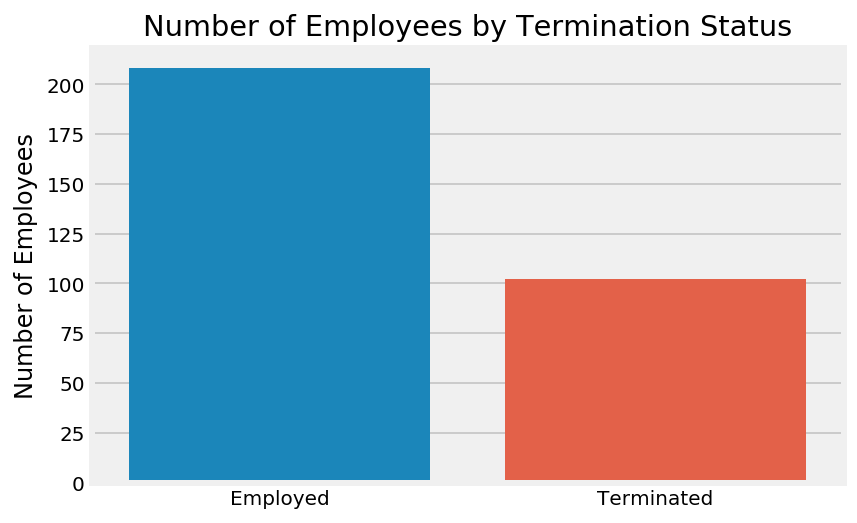

In [15]:
# DV: Employement status distribution - histogram
sns.countplot(x=df_core['term_status_value'])
plt.xlabel('')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Termination Status')

#### Some EDA visualizations:

Text(0.5, 0, '')

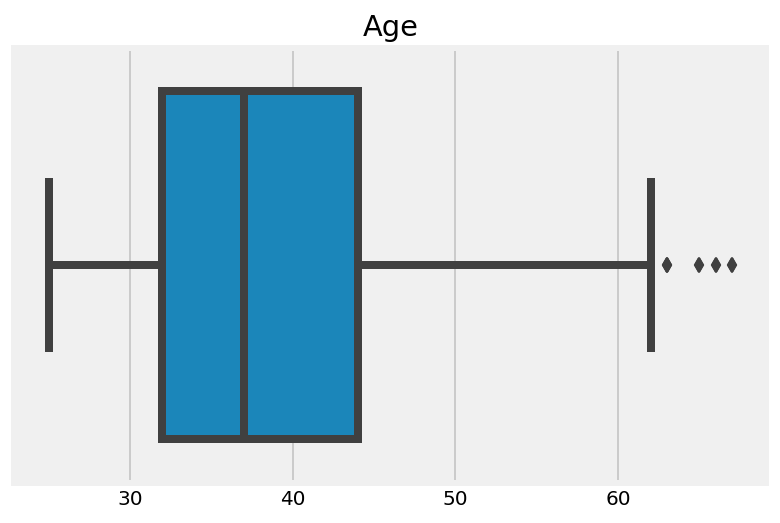

In [16]:
# Take a look at some of the features & detect outliers
sns.boxplot(x=df_core['Age'])
plt.title('Age')
plt.xlabel('')
# Here there are a couple of outliers -- It appears a couple employees are above the age of 60

Text(0.5, 0, '')

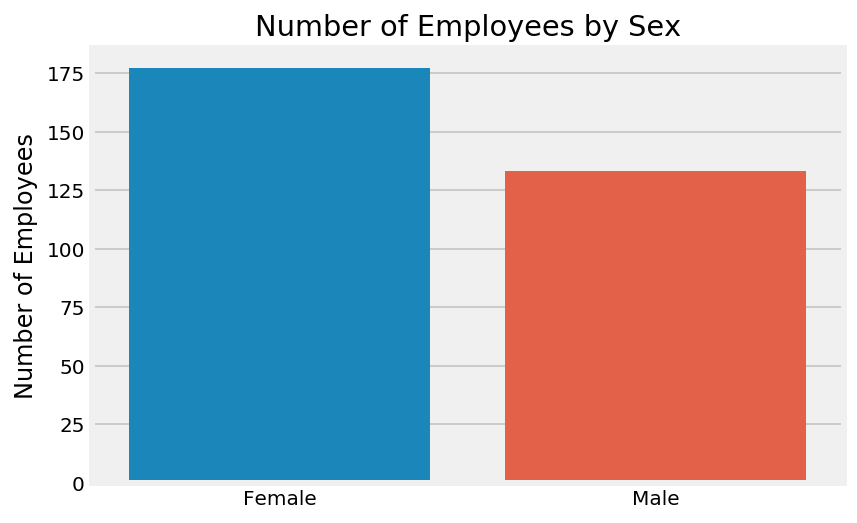

In [17]:
# Gender
sns.countplot(x=df_core['Sex'])
plt.title('Number of Employees by Sex')
plt.ylabel('Number of Employees')
plt.xlabel('')

Text(0.5, 0, '')

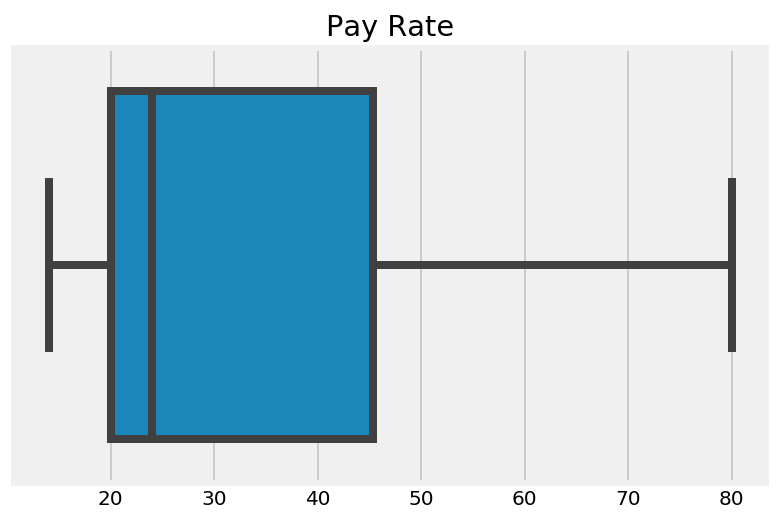

In [18]:
sns.boxplot(x=df_core['Pay_Rate'])
plt.title('Pay Rate')
plt.xlabel('')

Text(0.5, 0, '')

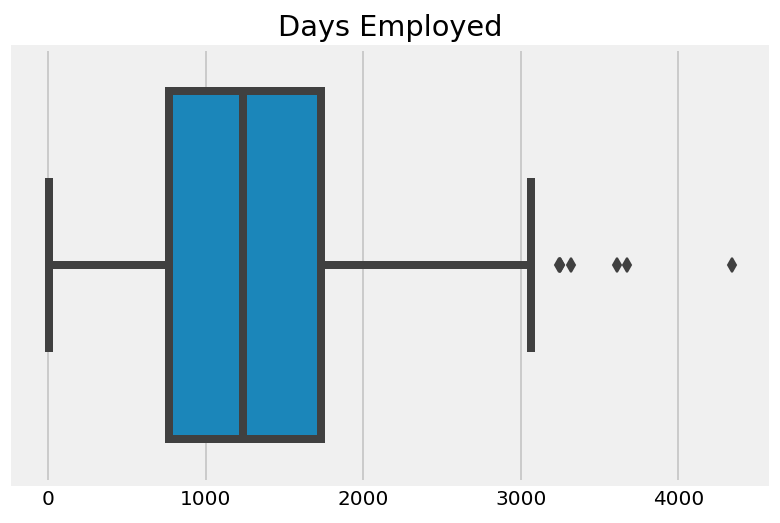

In [19]:
sns.boxplot(x=df_core['Days_Employed'])
plt.title('Days Employed')
plt.xlabel('')
# Here there is a couple of outliers -- Most prominently, there are employees with more than 3,000 days with the company

Text(0, 0.5, 'Number of Days')

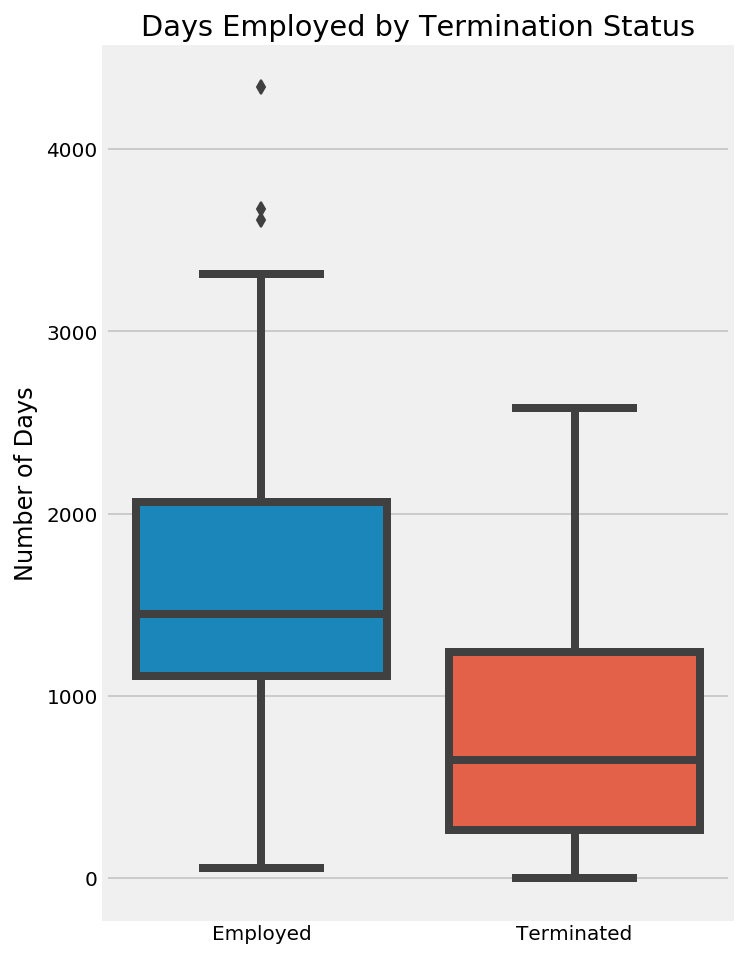

In [20]:
plt.figure(figsize=(5,8))
sns.boxplot(y = 'Days_Employed', x = 'term_status_value', data = df_core)
plt.title('Days Employed by Termination Status')
plt.xlabel('')
plt.ylabel('Number of Days')

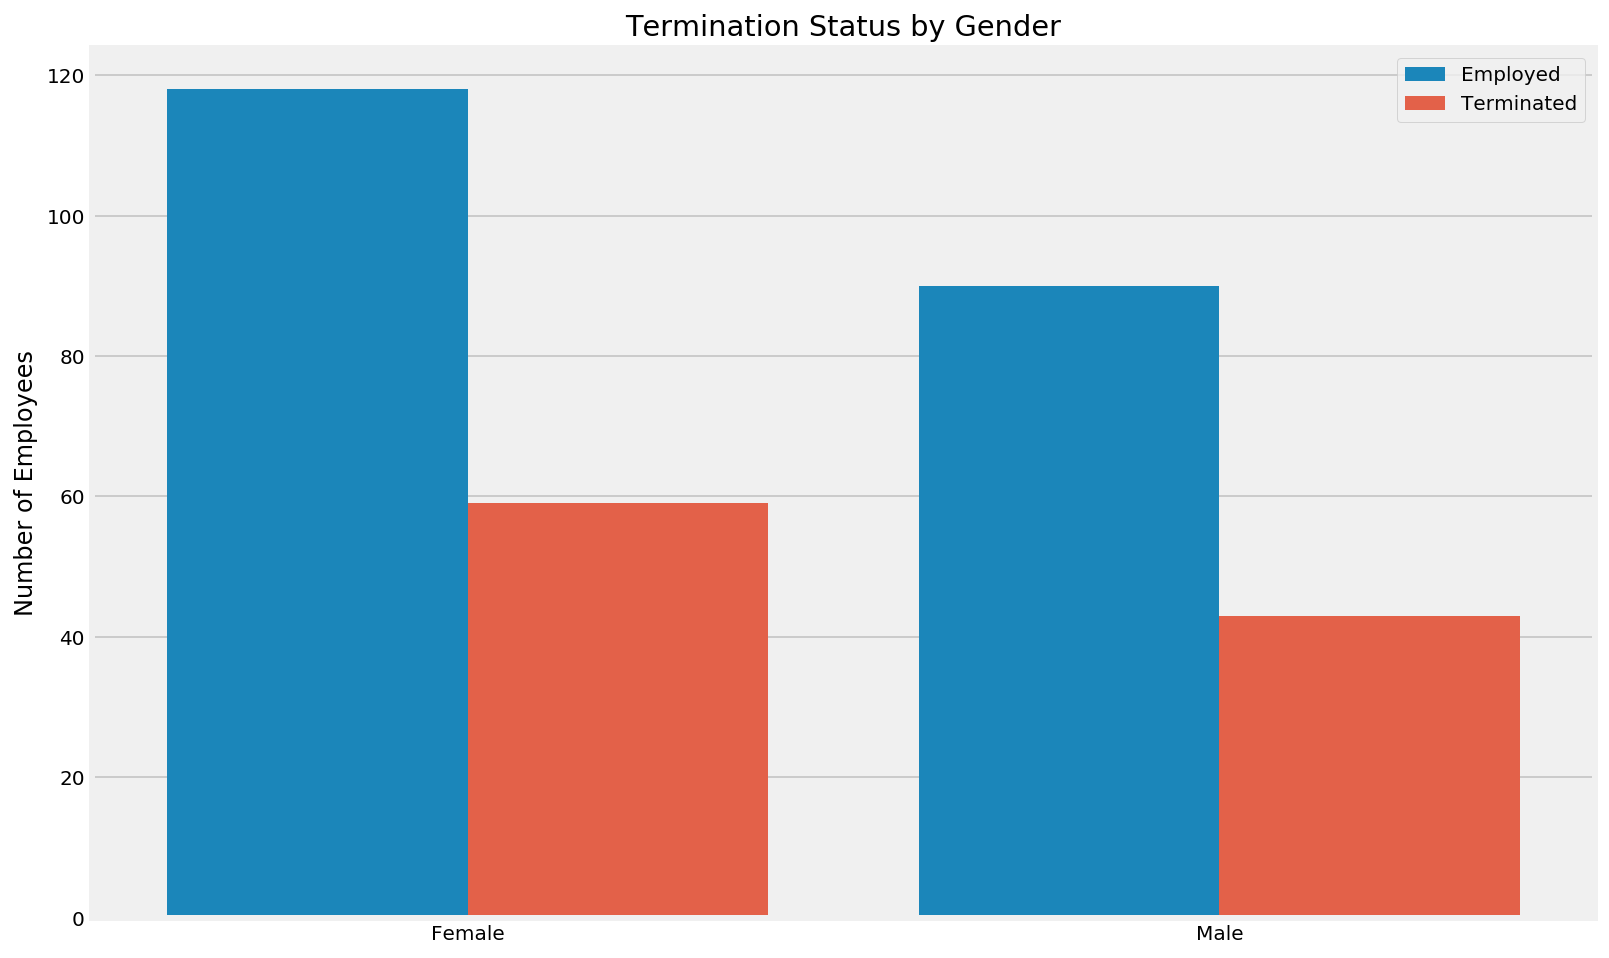

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(x=df_core['Sex'],hue=df_core['term_status_value'])
plt.title('Termination Status by Gender')
plt.xlabel('')
plt.ylabel('Number of Employees')
plt.legend().texts[0].set_text('Employed')

In [22]:
df_core.Department.value_counts()

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Department, dtype: int64

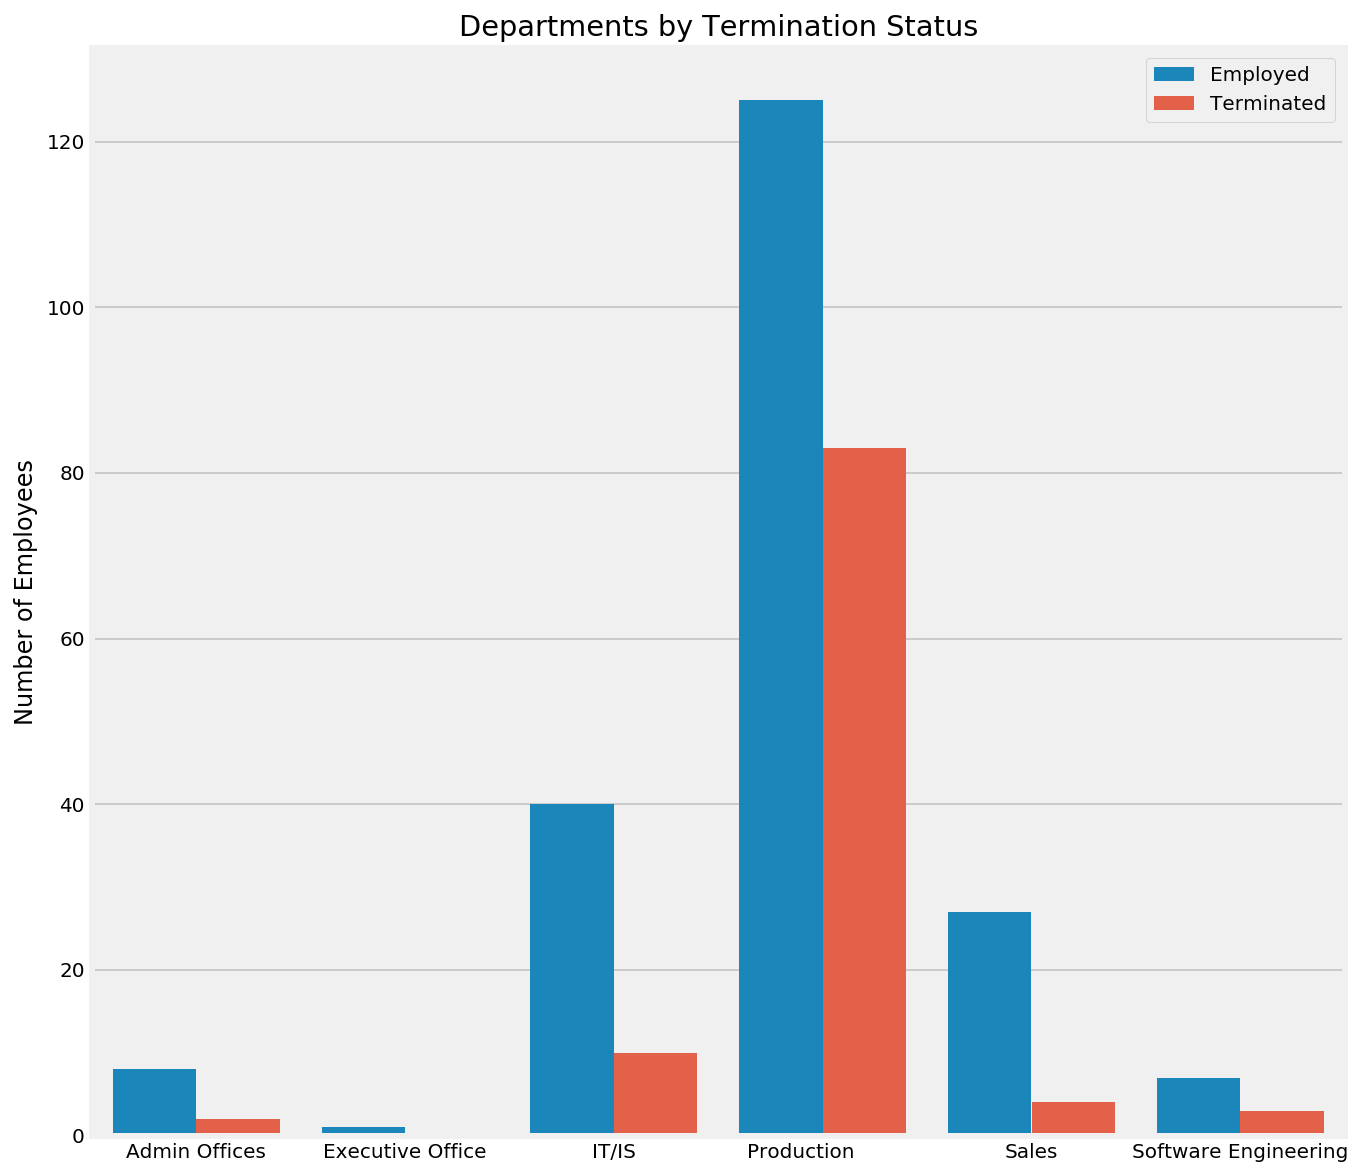

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_core['Department'],hue=df_core['term_status_value'])
plt.title('Departments by Termination Status')
plt.ylabel('Number of Employees')
plt.xlabel('')
plt.legend().texts[0].set_text('Employed')

---

### Data Preparation
In this section, I am checking for any missing data and cleaning up any variables in preparation for the model.

In [24]:
# Clean null values
df_core.isnull().sum()

# I have null values for date of termination, however, I argue that this feature is not necessary
# If we are thinking temporal ordering, then logically the termination date comes after performance scores
# Thus, I will exclude this variable from the model

Employee_Name            0
Employee_Number          0
MarriedID                0
MaritalStatusID          0
GenderID                 0
EmpStatus_ID             0
DeptID                   0
Perf_ScoreID             0
Age                      0
Pay_Rate                 0
State                    0
Zip                      0
DOB                      0
Sex                      0
MaritalDesc              0
CitizenDesc              0
Hispanic/Latino          0
RaceDesc                 0
Date_of_Hire             0
Days_Employed            0
Date_of_Termination    207
Reason_For_Term          0
Employment_Status        0
Department               0
Position                 0
Manager_Name             0
Employee_Source          0
Performance_Score        0
term_status              0
term_status_value        0
dtype: int64

In [25]:
# Going to clean non-numeric features for model
# For this analysis, I choose to include Department & Race in my model
# Thus, I create dummy variables for each value
df_core=pd.get_dummies(df_core, columns=['Department'])

In [26]:
df_core.RaceDesc.value_counts()

White                               193
Black or African American            57
Asian                                34
Two or more races                    18
Hispanic                              4
American Indian or Alaska Native      4
Name: RaceDesc, dtype: int64

In [27]:
# Create function to recode values
def race_recode(series):
    if series == "White":
        return 0
    else:
        return 1

# Apply function to Employment_Status to create term_status
df_core['race_nonwhite'] = df_core['RaceDesc'].apply(race_recode)

df_core.race_nonwhite.value_counts()

0    193
1    117
Name: race_nonwhite, dtype: int64

In [28]:
# Replace white spaces in column names with '_'
df_core.columns = df_core.columns.str.replace(' ', '_')

In [29]:
# I see Department_Production is named incorrectly
# I also want to remove the '/' in the names
df_core.columns = df_core.columns.str.replace('/', '_')
df_core.rename(columns={"Department_Production_______": "Department_Production"}, inplace=True)

In [30]:
df_core.shape

(310, 36)

#### Preliminary Analysis 

After cleaning the dataset, I retain the complete dataset. There are 310 observations and 36 variables. Because I will not include termination date, there is not issue with missing data. 

### Variable Selection
---

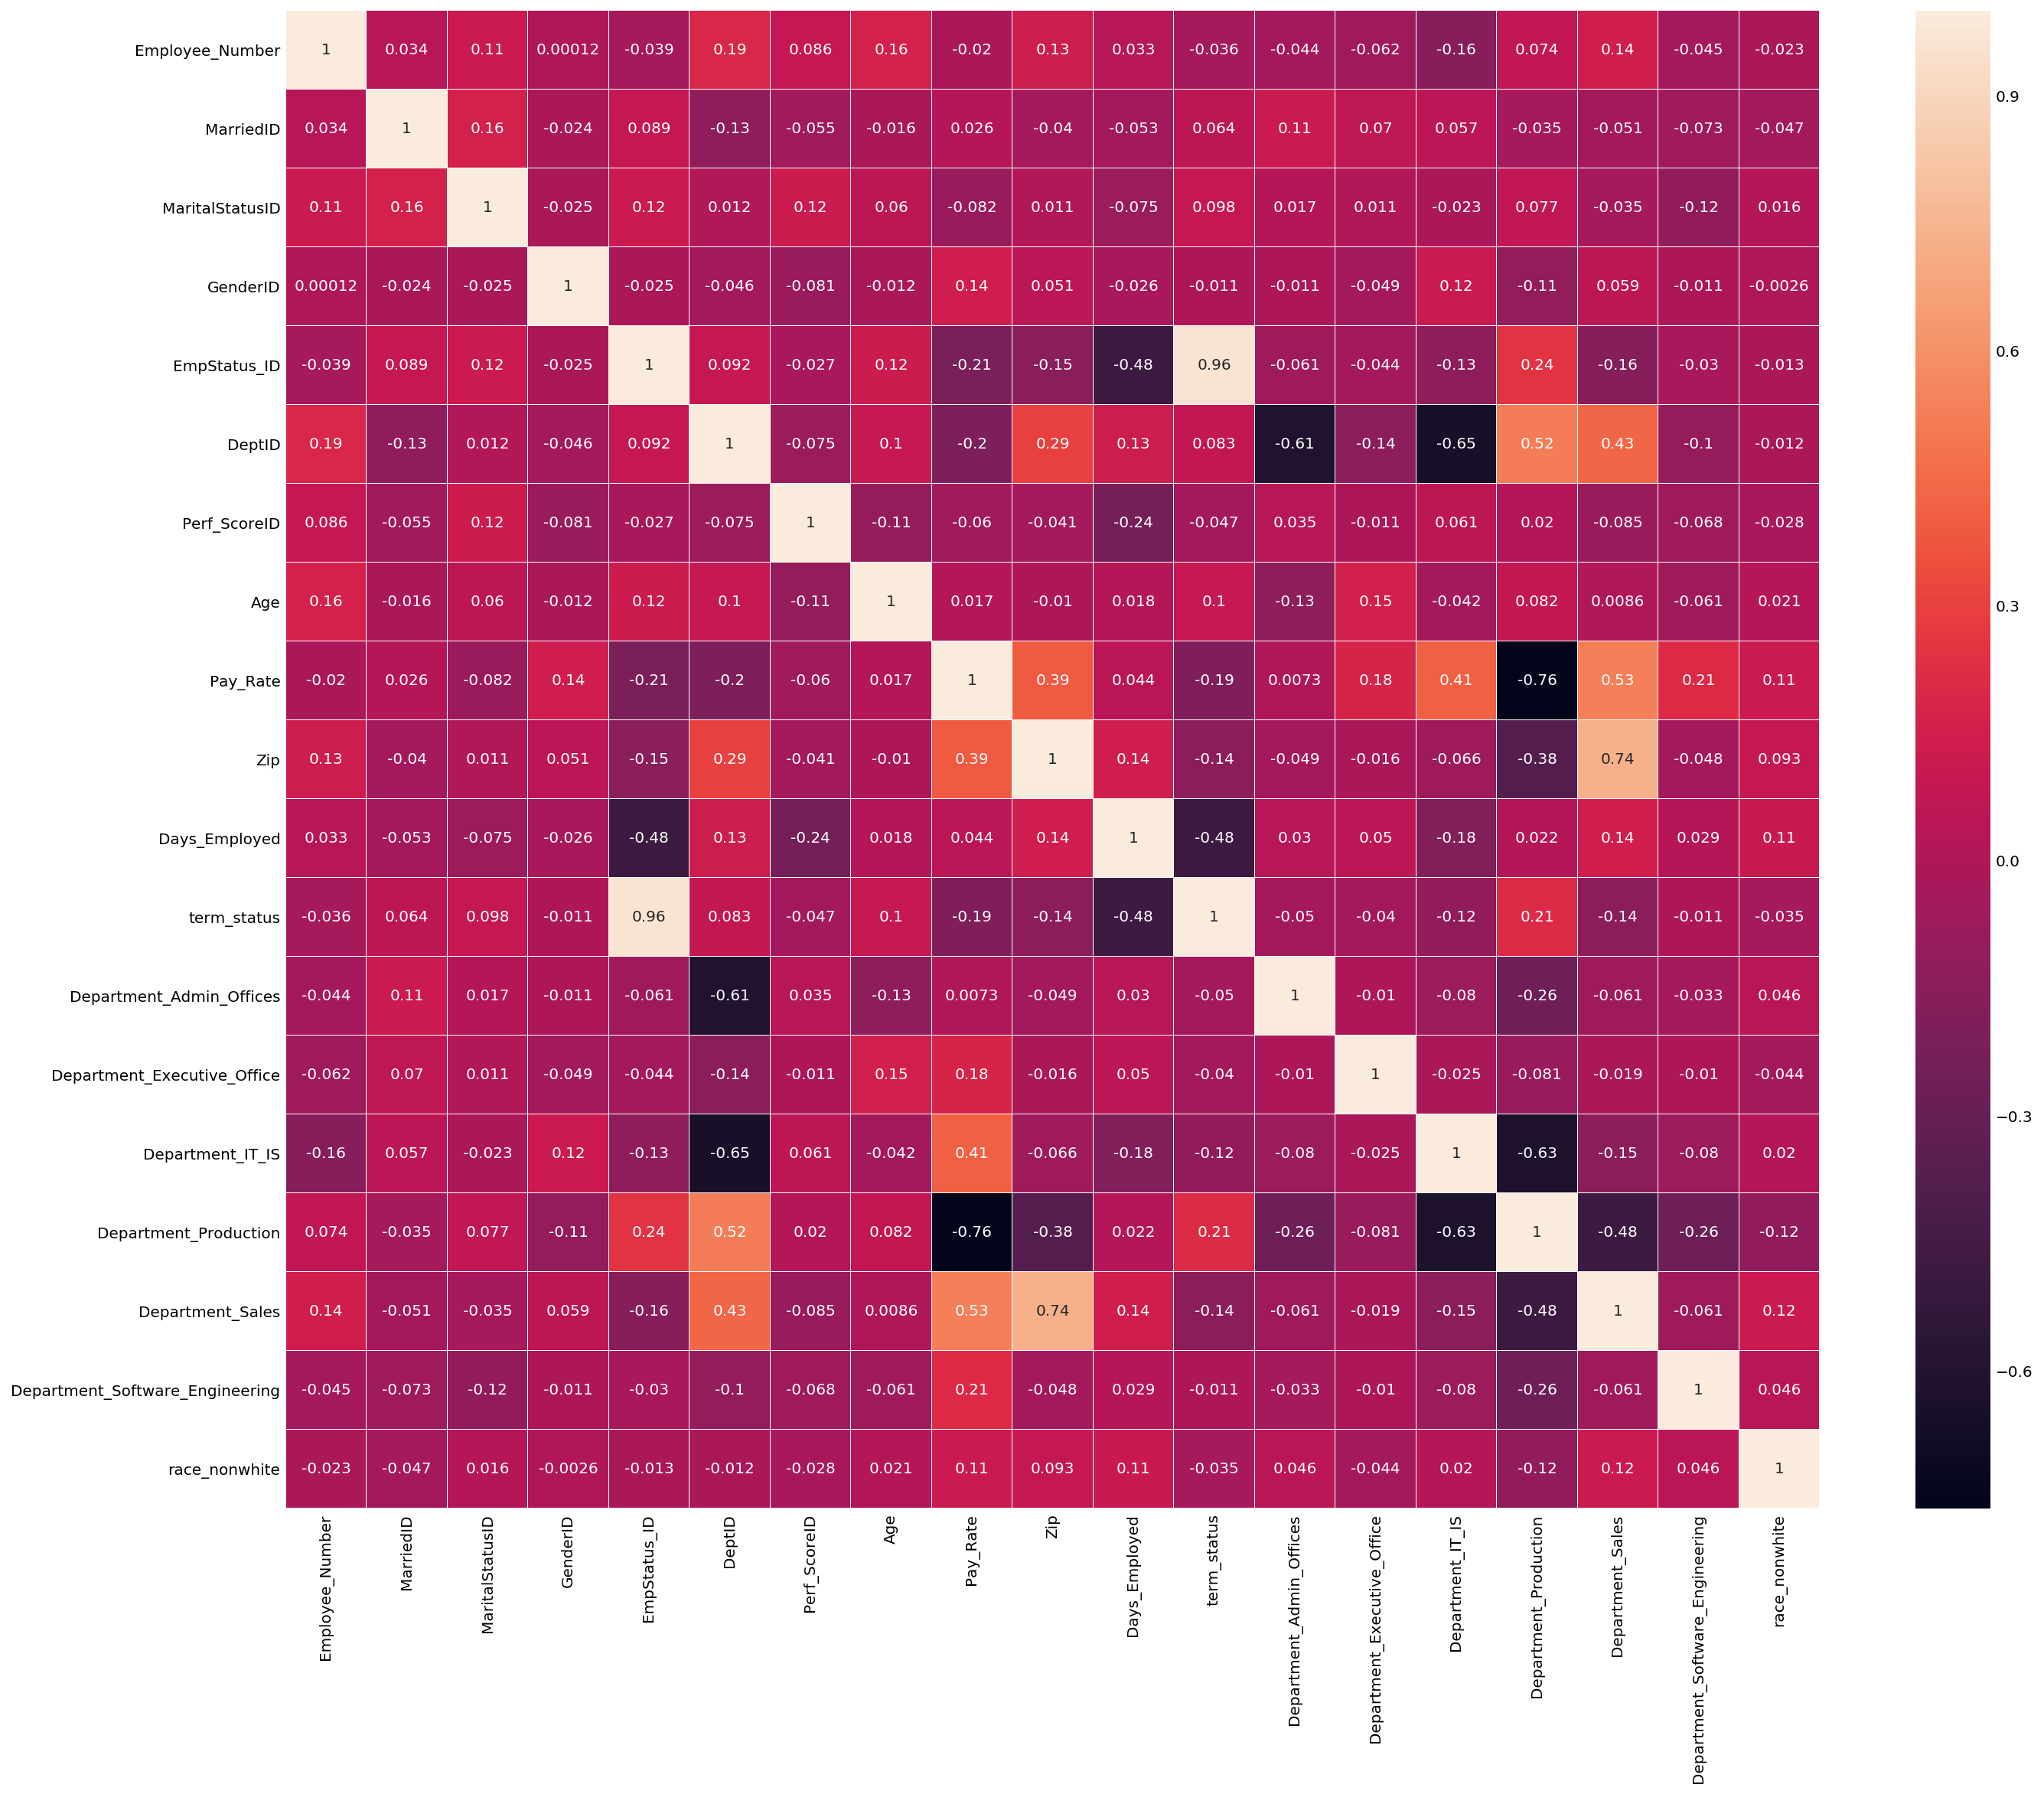

In [31]:
# Correlation analysis
plt.figure(figsize=(20,18))
sns.heatmap(df_core.corr(), annot=True, linewidths=0.01)

In [32]:
# Looking at some of the feature columns with large correlation value
# Pay_Rate
df_core.Pay_Rate.head()

# Assume - salary per hour

0    28.50
1    23.00
2    29.00
3    21.50
4    16.56
Name: Pay_Rate, dtype: float64

In [33]:
# Days_Employed
df_core.Days_Employed.head()

# Convert to years
df_core['year_employed'] = df_core['Days_Employed']/365
df_core.year_employed.head()

0    9.087671
1    3.890411
2    3.161644
3    0.158904
4    2.575342
Name: year_employed, dtype: float64

Text(0.5, 1.0, 'Years Employed')

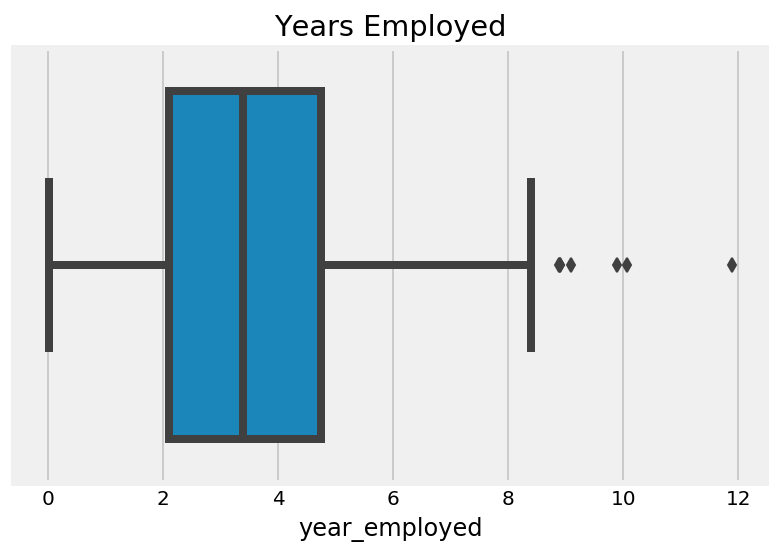

In [34]:
sns.boxplot(x=df_core['year_employed'])
plt.title('Years Employed')
# Here there is a couple of outliers -- Most prominently, there are employees with more than 8 years with the company

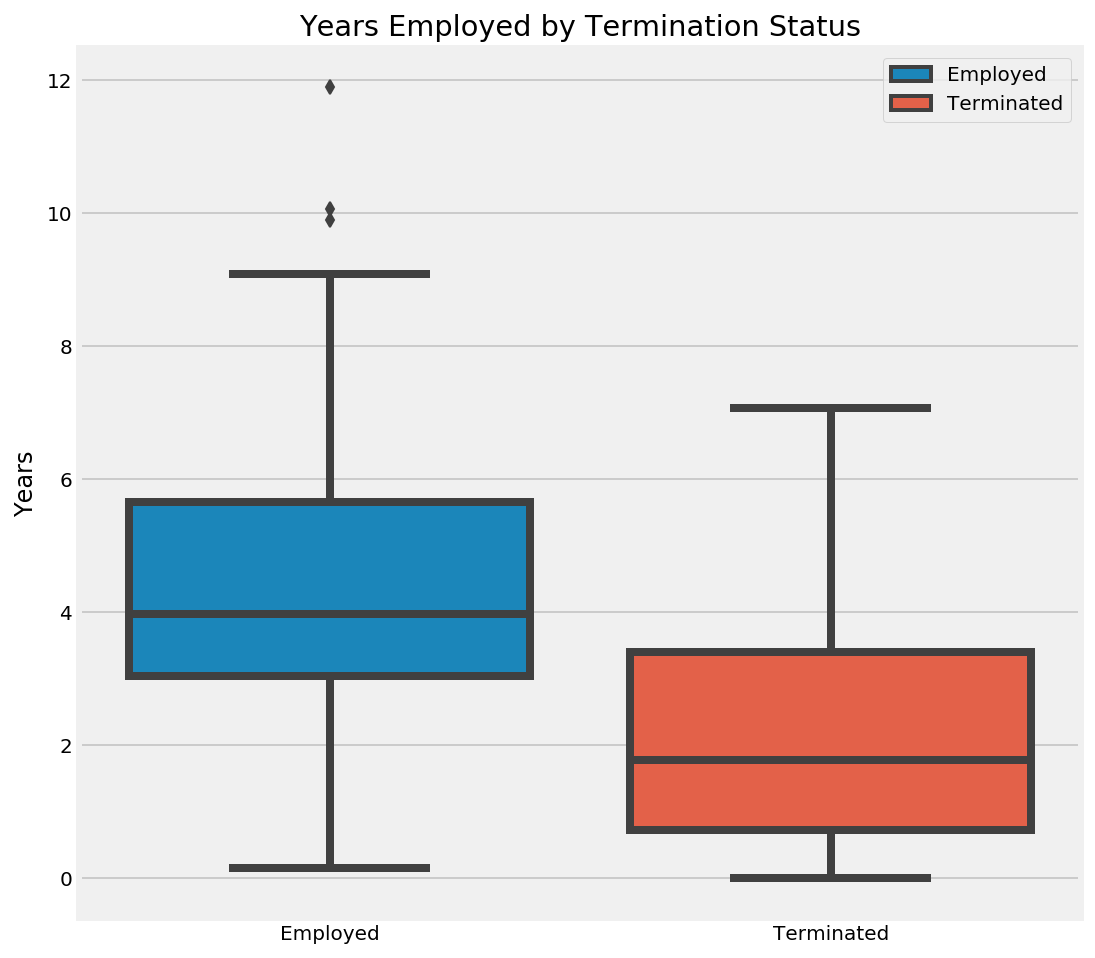

In [35]:
plt.figure(figsize=(8,8))
sns.boxplot(x="term_status_value", y="year_employed", data=df_core, hue = "term_status_value", dodge=False)
plt.title('Years Employed by Termination Status')
plt.ylabel('Years')
plt.xlabel('')
plt.legend().texts[0].set_text('Employed')

In [36]:
# Reminder of column names
df_core.columns

Index(['Employee_Name', 'Employee_Number', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatus_ID', 'DeptID', 'Perf_ScoreID', 'Age', 'Pay_Rate',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic_Latino', 'RaceDesc', 'Date_of_Hire', 'Days_Employed',
       'Date_of_Termination', 'Reason_For_Term', 'Employment_Status',
       'Position', 'Manager_Name', 'Employee_Source', 'Performance_Score',
       'term_status', 'term_status_value', 'Department_Admin_Offices',
       'Department_Executive_Office', 'Department_IT_IS',
       'Department_Production', 'Department_Sales',
       'Department_Software_Engineering', 'race_nonwhite', 'year_employed'],
      dtype='object')

In [37]:
predictors = ['Perf_ScoreID','MarriedID','GenderID','Age','Pay_Rate','year_employed', 
              'Department_Admin_Offices', 'Department_Executive_Office',
              'Department_IT_IS', 'Department_Production', 'Department_Sales',
              'Department_Software_Engineering','race_nonwhite']

In [38]:
# Define X and y
X = df_core[predictors]
y = df_core.term_status

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Perf_ScoreID                       310 non-null int64
MarriedID                          310 non-null int64
GenderID                           310 non-null int64
Age                                310 non-null int64
Pay_Rate                           310 non-null float64
year_employed                      310 non-null float64
Department_Admin_Offices           310 non-null uint8
Department_Executive_Office        310 non-null uint8
Department_IT_IS                   310 non-null uint8
Department_Production              310 non-null uint8
Department_Sales                   310 non-null uint8
Department_Software_Engineering    310 non-null uint8
race_nonwhite                      310 non-null int64
dtypes: float64(2), int64(5), uint8(6)
memory usage: 18.8 KB


In [40]:
X.describe()

,Perf_ScoreID,MarriedID,GenderID,Age,Pay_Rate,year_employed,Department_Admin_Offices,Department_Executive_Office,Department_IT_IS,Department_Production,Department_Sales,Department_Software_Engineering,race_nonwhite
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,3.458065,0.396774,0.429032,38.867742,31.284806,3.550906,0.032258,0.003226,0.161290,0.670968,0.100000,0.032258,0.377419
std,2.318460,0.490019,0.495738,8.922459,15.383615,2.108196,0.176970,0.056796,0.368393,0.470621,0.300485,0.176970,0.485525
min,0.000000,0.000000,0.000000,25.000000,14.000000,0.005479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,32.000000,20.000000,2.099315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,37.000000,24.000000,3.391781,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,44.000000,45.315000,4.747260,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,9.000000,1.000000,1.000000,67.000000,80.000000,11.887671,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
y.value_counts()

# It is imbalanced -- the majority is ('Employed - 0') and the minority class is ('Terminated - 1')

0    208
1    102
Name: term_status, dtype: int64

### Working Model

Bcause the target is binary, I will build a classification tree model to predict the termination status of employees based on the selected features. I am specifically interested in understanding the length of employment on performance skills.

---

#### Classification Tree

Text(0.5, 1.0, 'Employees by Years Employed, Age, and Term Status')

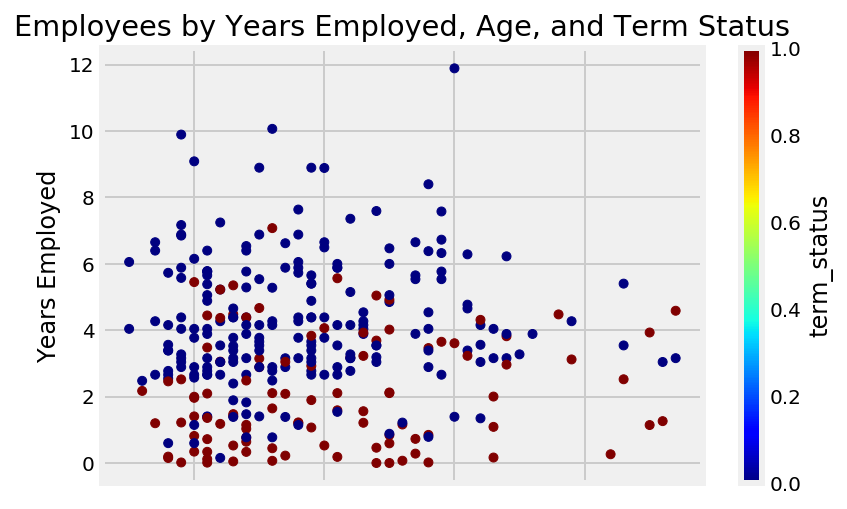

In [41]:
df_core.plot(kind='scatter', x='Age', y='year_employed', c='term_status', colormap='jet')
plt.ylabel('Years Employed')
plt.xlabel('Age')
plt.title('Employees by Years Employed, Age, and Term Status')

In [42]:
# Split data for testing - 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [43]:
# After splitting
print(X_train.shape)
print(X_test.shape)

(217, 13)
(93, 13)


In [44]:
# Fit a classification tree with max_depth=3 on all data.
treeclf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf = treeclf.fit(X_train, y_train) # Train decision tree classifier
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [45]:
# Predict response for test dataset
y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Pretty good accuracy - but I will try tuning

Accuracy: 0.8172043010752689


In [47]:
# Create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='Images/tree_term.dot', feature_names=predictors)

# dot -Tpng tree_term.dot -o tree_term.png

In [48]:
# Compute the feature importances (the Gini index at each node)
pd.DataFrame({'feature': predictors, 'importance':treeclf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
5,year_employed,0.702602
4,Pay_Rate,0.231025
3,Age,0.066372
0,Perf_ScoreID,0.000000
1,MarriedID,0.000000
2,GenderID,0.000000
6,Department_Admin_Offices,0.000000
7,Department_Executive_Office,0.000000
8,Department_IT_IS,0.000000
9,Department_Production,0.000000


### Model Tuning
I am going to try to improve model accuracy by tuning the max_depth parameter.

In [49]:
# List of values to try
max_depth_range = list(range(1, 8))

# Create list to store the accuracy for each value of max_depth
accuracy_scores = []

# Create loop to get list of values to try for max_depth
for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf = treeclf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))

In [50]:
# Show the best accuracy and the corresponding max_depth.
sorted(zip(accuracy_scores, max_depth_range))[6]

(0.8494623655913979, 4)

Text(0, 0.5, 'Accuracy % (Higher is better)')

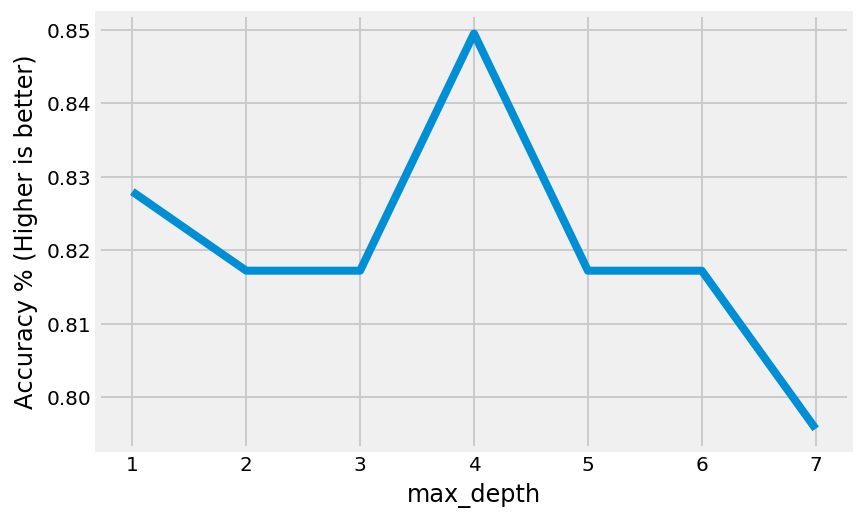

In [51]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy % (Higher is better)')

In [52]:
# Fit a tree using that parameter.
# First we need to split our data again in case further tuning is required
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [53]:
# After splitting
print(X_train.shape)
print(X_test.shape)

(217, 13)
(93, 13)


In [54]:
# Instantiate a tree regressor
# Fit a classification tree with max_depth=2 on all data.
treeclf = DecisionTreeClassifier(max_depth=4, random_state=42)
treeclf.fit(X_train, y_train) # Train decision tree classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [55]:
# Compute feature importances
pd.DataFrame({'feature': predictors, 'importance':treeclf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
5,year_employed,0.574308
4,Pay_Rate,0.218494
0,Perf_ScoreID,0.147053
3,Age,0.060145
1,MarriedID,0.000000
2,GenderID,0.000000
6,Department_Admin_Offices,0.000000
7,Department_Executive_Office,0.000000
8,Department_IT_IS,0.000000
9,Department_Production,0.000000


In [57]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='Images/tree_term_2.dot', feature_names=predictors, class_names='term_status')

# dot -Tpng tree_term_2.dot -o tree_term_2.png

#### Evaluate model using the test set

In [58]:
# Get test predictions
y_pred = treeclf.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8494623655913979


In [60]:
# Higher % than previous model - better model
# Accuracy increased to 84.9%

#### Interpretation:
The model demonstrates different pathways employees who have been with the company for more than and less than 2.5 years. 

A noticeable observation is that term status is higher for employees who been with the company for a greater amount of time (not less than 2.5 years), have greater pay rates (not less than $23.75/hour), and are less than 40 years old (51 employees to 1). 

### Recommendation
The classification tree has an 84.9% accuracy rate in predicting any new employee entering this data model. For this reason, I suggest moving forward with the classification tree as the results are easier to interpret and understand.

---

## Data Viz Addition 
I created this dataset to join with the core dataset in Tableau to create the following image. This was just a fun thing I created using both python and Tableau. I followed the method provided by Alexander Varlamov. 

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_pic(N=310, rseed=42):
    from matplotlib.image import imread
    data = imread('Images/clock.dms')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

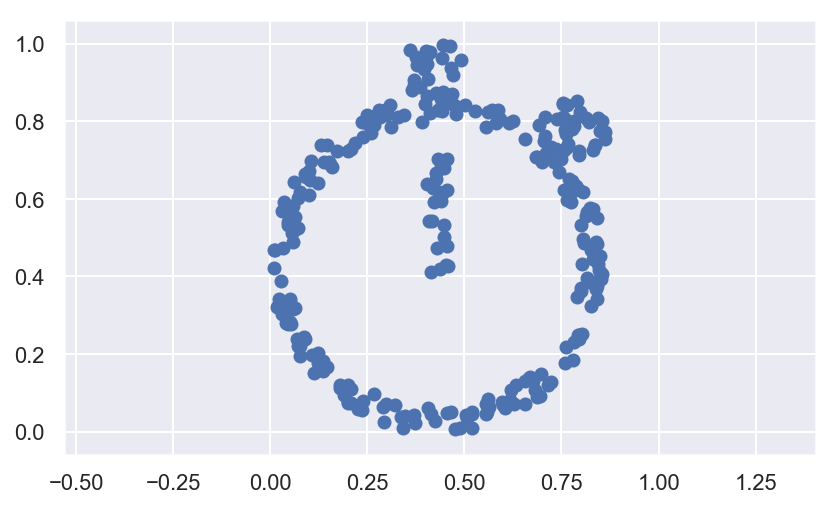

In [63]:
X = make_pic(310)

plt.scatter(X[:, 0], X[:, 1])

plt.axis('equal');

In [68]:
file_path = 'Tableau_HR_Analysis/output1.csv'

In [69]:
import csv
with open(file_path, 'w', newline='') as csvfile:
  writer = csv.writer(csvfile, delimiter=';')
  writer.writerows(X)

In [70]:
# I read the file back in to check
output1 = pd.read_csv(file_path, delimiter=';')

In [71]:
# Formatted the data
output1 = pd.read_csv(file_path, 
                  delimiter=';', 
                  names=["X","Y"])

In [72]:
# Added the Row_Num field to join in Tableau
output1['Row_Num'] = np.arange(len(output1))
output1.to_csv(file_path)

In [73]:
file_path_2 = 'Tableau_HR_Analysis/HR_Tableau.csv'

In [74]:
# Added the Row_Num field to the core dataset to join in Tableau
df_core['Row_Num'] = np.arange(len(df_core))
df_core.to_csv(file_path_2)